# Run linescans to test GP parameters for H1, deltaH, S6, S7, S3, S4, Obj

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import pickle
import numpy as np
from modules.bayes_optimization import BayesOpt, negUCB, negExpImprove
from modules.OnlineGP import OGP
import numpy as np
import importlib
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import sys
import os
sys.path.insert(1, '/home/chenyu/Desktop/GaussianProcess/GPTrelated')
saveResultsQ = False
import scipy
import tensorflow as tf
# %matplotlib qt
# %matplotlib

failed to import parallelstuff


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
os.environ["CUDA_VISIBLE_DEVICES"]="0" # specify which GPU to use
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

In [10]:
# free space from GPU device
from numba import cuda
cuda.select_device(0)
cuda.close()

## Run line scan for each of the parameter

Model loaded
[-39.49137]


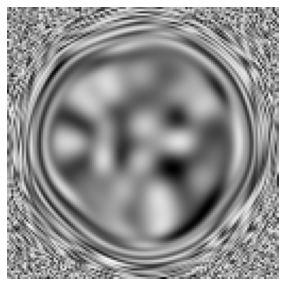

In [44]:
ndim = 7
dev_ids =  [str(x+1) for x in np.arange(ndim)]
H1_list = np.linspace(1000,2200,num=100)
start_point = [[1498 , 0, 390000 , -654100, -3.75036e6, 119931.5, 648691.415]] 
mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point, CNNoption=1) #an isotropic n-dimensional gaussian with amplitude=1, centered at the origin, plus gaussian background noise with std dev = 0.1
print(mi.getState()[1][0]*1112.7)

# clear_output(wait=True)
# print(H1_list[i], emit_profile[i])
fig = plt.figure(figsize = [5,5])
temp = np.load('ronchigram.npy')
plt.imshow(temp, cmap='gray')
plt.axis('off')
plt.show()

-3.7495 [-0.17297451]


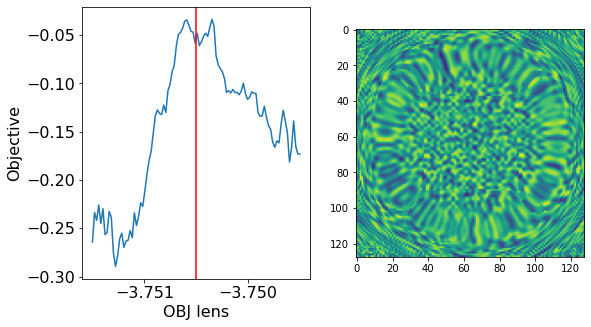

In [3]:
# Line scan for objective lens
ndim = 7 #input dimension, set to 2 for two hexapoles
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation

dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
# Parameters in the order of H1, H1-H2, S1, S2, S3, S4, S6, S7

OBJ_list = np.linspace(-3.7515e6,-3.7495e6,num=100)
emit_profile = np.zeros([100,1])

for i in range(len(OBJ_list)):

    start_point = [[1498 , 0, 390000 , -654100, OBJ_list[i], 119931.5, 648691.415]] 
    mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
    mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point, CNNoption = 1) #an isotropic n-dimensional gaussian with amplitude=1, centered at the origin, plus gaussian background noise with std dev = 0.1
    emit_profile[i] = mi.getState()[1][0]

    clear_output(wait=True)
    print(OBJ_list[i]/1e6, emit_profile[i])
    fig = plt.figure(figsize = [9,5])
    plt.subplot(121)
    plt.plot(np.asarray(OBJ_list/1e6), emit_profile)
    plt.xlabel('OBJ lens', fontsize=16)
    plt.ylabel('Objective', fontsize = 16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.locator_params(axis="x", nbins=4)
    plt.locator_params(axis="y", nbins=6)
    plt.axvline(x = -3.7505, c = 'r')
    
    temp = np.load('ronchigram.npy')
    plt.subplot(122)
    plt.imshow(temp)
    plt.show()
    
    np.save('OBJ_-3.7515e6_-3.7495e6_100steps_40mrad_Coarse_CNNemittance.npy',emit_profile)

2200.0 [-0.21163675]


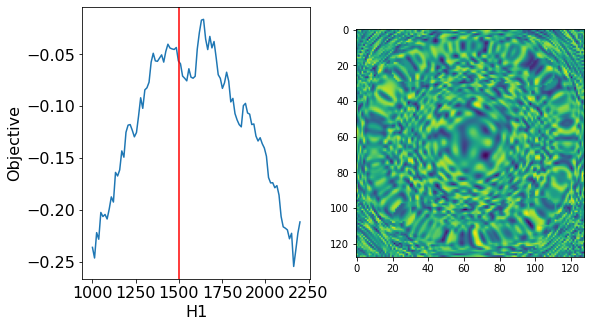

In [3]:
# Line scan for H1
ndim = 7 #input dimension, set to 2 for two hexapoles
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation

dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
# Parameters in the order of H1, H1-H2, S1, S2, S3, S4, S6, S7

H1_list = np.linspace(1000,2200,num=100)
emit_profile = np.zeros([100,1]) - 1

for i in range(len(H1_list)):

    start_point = [[H1_list[i] , 0, 390000 , -654100, -3.7505e6, 119931.5, 648691.415]] 
    mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
    mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point, CNNoption=1) #an isotropic n-dimensional gaussian with amplitude=1, centered at the origin, plus gaussian background noise with std dev = 0.1
    emit_profile[i] = mi.getState()[1][0]

    clear_output(wait=True)
    print(H1_list[i], emit_profile[i])
    fig = plt.figure(figsize = [9,5])
    plt.subplot(121)
    plt.plot(H1_list, emit_profile)
    plt.xlabel('H1', fontsize=16)
    plt.ylabel('Objective', fontsize = 16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=6)
    plt.axvline(x = 1498, c = 'r')
    
    temp = np.load('ronchigram.npy')
    
    plt.subplot(122)
    plt.imshow(temp)
    plt.show()
    
    np.save('H1_1000_2200_100steps_40mrad_Coarse_CNNemittance.npy',emit_profile)

20.0 [-0.18537563]


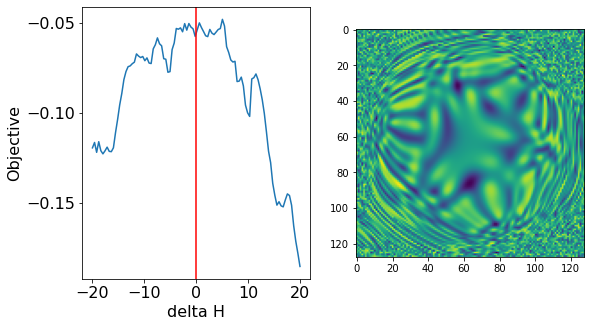

In [3]:
# Line scan for deltaH
ndim = 7 #input dimension, set to 2 for two hexapoles
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation

dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
# Parameters in the order of H1, H1-H2, S1, S2, S3, S4, S6, S7

deltaH_list = np.linspace(-20, 20, num=100)
emit_profile = np.zeros([100,1])
# emit_profile = np.load('deltaH_-20_20_100steps_40mrad_CNNemittance.npy')

for i in range(len(deltaH_list)):
    
    if emit_profile[i]!=0:
        continue

    start_point = [[1498.2 , deltaH_list[i], 390000 , -654100, -3.7505e6, 119931.5, 648691.415]] 
    mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
    mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point, CNNoption = 1) #an isotropic n-dimensional gaussian with amplitude=1, centered at the origin, plus gaussian background noise with std dev = 0.1
    emit_profile[i] = mi.getState()[1][0]

    clear_output(wait=True)
    print(deltaH_list[i], emit_profile[i])
    fig = plt.figure(figsize = [9,5])
    plt.subplot(121)
    plt.plot(deltaH_list, emit_profile)
    plt.xlabel('delta H', fontsize=16)
    plt.ylabel('Objective', fontsize = 16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=6)
    plt.axvline(x = 0, c = 'r')
    
    temp = np.load('ronchigram.npy')
    plt.subplot(122)
    plt.imshow(temp)
    plt.show()
    
    np.save('deltaH_-20_20_100steps_40mrad_Coarse_CNNemittance.npy',emit_profile)

391000.0 [-0.12630585]


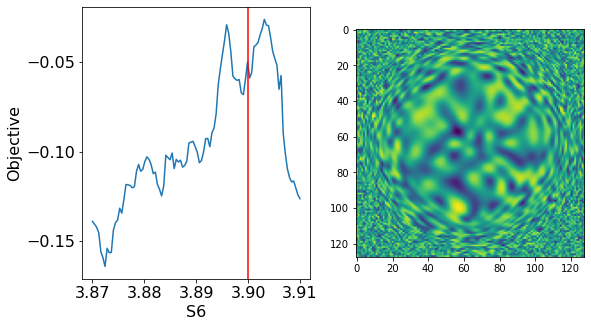

In [3]:
# Line scan for S6
ndim = 7 #input dimension, set to 2 for two hexapoles
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation

dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
# Parameters in the order of H1, H1-H2, S1, S2, S3, S4, S6, S7

S6_list = np.linspace(387000,391000,num=100)
emit_profile = np.zeros([100,1]) - 0.7

for i in range(len(S6_list)):

    start_point = [[1498.2, 0, S6_list[i], -654100, -3.7505e6, 119931.5, 648691.415]] 
    mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
    mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point, CNNoption = 1) #an isotropic n-dimensional gaussian with amplitude=1, centered at the origin, plus gaussian background noise with std dev = 0.1
    emit_profile[i] = mi.getState()[1][0]

    clear_output(wait=True)
    print(S6_list[i], emit_profile[i])
    
    fig = plt.figure(figsize = [9,5])
    plt.subplot(121)
    plt.plot(S6_list/100000, emit_profile)
    plt.xlabel('S6', fontsize=16)
    plt.ylabel('Objective', fontsize = 16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=6)
    plt.axvline(x = 3.9, c = 'r')
    
    temp = np.load('ronchigram.npy')
    plt.subplot(122)
    plt.imshow(temp)
    plt.show()
    np.save('S6_3.87e5_3.91e5_100steps_40mrad_Coarse_CNNemittance.npy',emit_profile)

-635000.0 [-0.14555693]


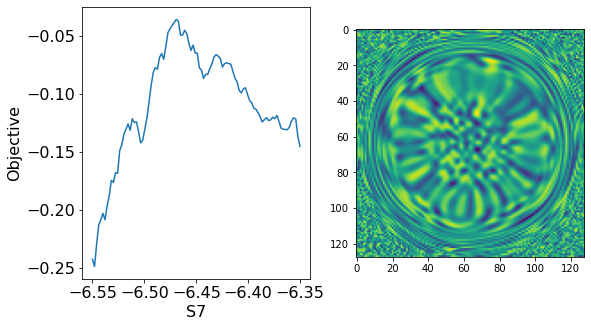

In [3]:
# Line scan for S7
ndim = 7 #input dimension, set to 2 for two hexapoles
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation

dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
# Parameters in the order of H1, H1-H2, S6, S7, OBJ, S3, S4

S7_list = np.linspace(-655000,-635000, num=100)
emit_profile = np.zeros([100,1]) - 0.7

for i in range(len(S7_list)):
    print(i)
    start_point = [[1498.2, 0, 391515, S7_list[i], -3.7505e6, 119931.5, 648691.415]] 
    mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
    mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point, CNNoption=1) #an isotropic n-dimensional gaussian with amplitude=1, centered at the origin, plus gaussian background noise with std dev = 0.1
    emit_profile[i] = mi.getState()[1][0]

    clear_output(wait=True)
    print(S7_list[i], emit_profile[i])
    fig = plt.figure(figsize = [9,5])
    plt.subplot(121)
    plt.plot(S7_list/100000, emit_profile)
    plt.xlabel('S7', fontsize=16)
    plt.ylabel('Objective', fontsize = 16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=6)
#     plt.axvline(x = -6.54, c = 'r')

    temp = np.load('ronchigram.npy')
    plt.subplot(122)
    plt.imshow(temp)
    plt.show()
    np.save('S7_-6.55e5_-6.35e5_100steps_40mrad_Coarse_CNNemittance.npy',emit_profile)

120300.0 [-0.55439103]


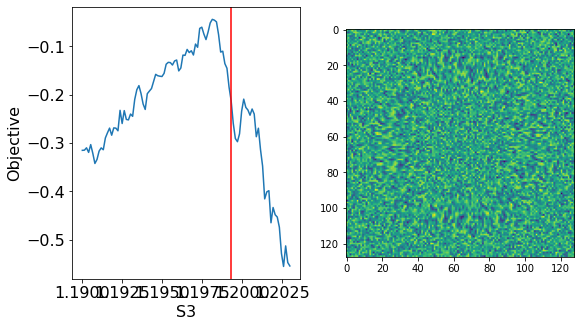

In [3]:
# Line scan for S3
ndim = 7 #input dimension, set to 2 for two hexapoles
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation

dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
# Parameters in the order of H1, H1-H2, S1, S2, S3, S4, S6, S7

S3_list = np.linspace(119000, 120300, num=100)
emit_profile = np.zeros([100,1])

for i in range(len(S3_list)):
    print(i)
    start_point = [[1498.2, 0, 391515, -654100, -3.7505e6, S3_list[i], 648691.415]] 
    mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
    mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point, CNNoption=1) #an isotropic n-dimensional gaussian with amplitude=1, centered at the origin, plus gaussian background noise with std dev = 0.1
    emit_profile[i] = mi.getState()[1][0]

    clear_output(wait=True)
    print(S3_list[i], emit_profile[i])
    fig = plt.figure(figsize = [9,5])
    plt.subplot(121)
    plt.plot(S3_list/100000, emit_profile)
    plt.xlabel('S3', fontsize=16)
    plt.ylabel('Objective', fontsize = 16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.locator_params(axis="x", nbins=6)
    plt.locator_params(axis="y", nbins=6)
    # 119931 is clearly not the optimal value for S3
    plt.axvline(x = 1.19931, c = 'r')
    
    temp = np.load('ronchigram.npy')
    plt.subplot(122)
    plt.imshow(temp)
    plt.show()
    np.save('S3_1.19e5_1.203e5_100steps_40mrad_Coarse_CNNemittance.npy',emit_profile)

651000.0 [-0.75121474]


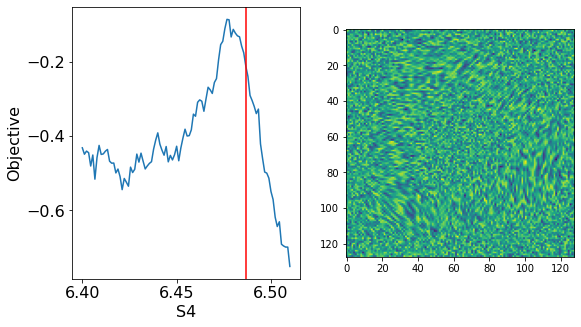

In [3]:
# Line scan for S4
ndim = 7 #input dimension, set to 2 for two hexapoles
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation

dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
# Parameters in the order of H1, H1-H2, S1, S2, S3, S4, S6, S7

S4_list = np.linspace(640000, 651000, num=100)
emit_profile = np.zeros([100,1])

for i in range(len(S4_list)):
    start_point = [[1498.2, 0, 391515, -654100, -3.7505e6, 119931.5, S4_list[i]]] 
    mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
    mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point, CNNoption=1) #an isotropic n-dimensional gaussian with amplitude=1, centered at the origin, plus gaussian background noise with std dev = 0.1
    emit_profile[i] = mi.getState()[1][0]

    clear_output(wait=True)
    print(S4_list[i], emit_profile[i])

    fig = plt.figure(figsize = [9,5])
    plt.subplot(121)
    plt.plot(S4_list/100000, emit_profile)
    plt.xlabel('S4', fontsize=16)
    plt.ylabel('Objective', fontsize = 16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.locator_params(axis="x", nbins=4)
    plt.locator_params(axis="y", nbins=6)
    plt.axvline(x = 6.48691, c = 'r')

    temp = np.load('ronchigram.npy')
    plt.subplot(122)
    plt.imshow(temp)
    plt.show()
    np.save('S4_6.4e5_6.51e5_100steps_40mrad_Coarse_CNNemittance.npy',emit_profile)

In [4]:
# Combine the data from different linescans
x = []
y = []
OBJ_list = np.linspace(-3.7515e6,-3.7495e6,num=100)
emit_profile = np.load('OBJ_-3.7515e6_-3.7495e6_100steps_40mrad_Coarse_CNNemittance.npy')
for i in range(len(OBJ_list)):
    start_point = [[1498 , 0, 390000 , -654100, OBJ_list[i], 119931.5, 648691.415]] 
    x.append(start_point)
    y.append(emit_profile[i])

In [5]:
H1_list = np.linspace(1000, 2200,num=100)
emit_profile = np.load('H1_1000_2200_100steps_40mrad_Coarse_CNNemittance.npy')
for i in range(len(H1_list)):
    start_point = [[H1_list[i] , 0, 390000 , -654100, -3.7505e6, 119931.5, 648691.415]] 
    x.append(start_point)
    y.append(emit_profile[i])

In [6]:
S4_list = np.linspace(640000, 651000, num=100)
emit_profile = np.load('S4_6.4e5_6.51e5_100steps_40mrad_Coarse_CNNemittance.npy')

for i in range(len(S4_list)):
    start_point = [[1498.2, 0, 391515, -654100, -3.7505e6, 119931.5, S4_list[i]]] 
    x.append(start_point)
    y.append(emit_profile[i])

In [7]:
S3_list = np.linspace(119000, 120300, num=100)
emit_profile = np.load('S3_1.19e5_1.203e5_100steps_40mrad_Coarse_CNNemittance.npy')

for i in range(len(S3_list)):
    start_point = [[1498.2, 0, 391515, -654100, -3.7505e6, S3_list[i], 648691.415]] 
    x.append(start_point)
    y.append(emit_profile[i])

In [8]:
S7_list = np.linspace(-655000,-635000, num=100)
emit_profile = np.load('S7_-6.55e5_-6.35e5_100steps_40mrad_Coarse_CNNemittance.npy')

for i in range(len(S7_list)):
    start_point = [[1498.2, 0, 391515, S7_list[i], -3.7505e6, 119931.5, 648691.415]] 
    x.append(start_point)
    y.append(emit_profile[i])

In [9]:
S6_list = np.linspace(387000,391000,num=100)
emit_profile = np.load('S6_3.87e5_3.91e5_100steps_40mrad_Coarse_CNNemittance.npy')

for i in range(len(S6_list)):
    start_point = [[1498.2, 0, S6_list[i], -654100, -3.7505e6, 119931.5, 648691.415]] 
    x.append(start_point)
    y.append(emit_profile[i])

In [10]:
np.save('OBJ_x.npy',np.squeeze(np.asarray(x)))
np.save('OBJ_y.npy',np.squeeze(np.asarray(y)))

## Aux Functions

## Previously used scripts

-648939.3939393939
Model loaded
[-0.24690656]


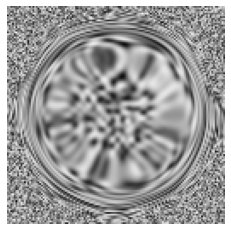

In [31]:
ndim = 7 #input dimension, set to 2 for two hexapoles
acquisition_delay = 0  #how long to wait between acquisitions- relevant for expriment, not for simulation

dev_ids =  [str(x+1) for x in np.arange(ndim)] #creat device ids (just numbers)
# Parameters in the order of H1, H1-H2, S1, S2, S3, S4, S6, S7

S7_list = np.linspace(-655000,-640000, num=100)
i = 40
print(S7_list[i])
start_point = [[1498.2, 0, 3.90e5, -647725, -3.7505e6, 119931.5, 648691.415]] 
mi_module = importlib.import_module('machine_interfaces.machine_interface_GPT')
mi = mi_module.machine_interface(dev_ids = dev_ids, start_point = start_point, CNNoption=1) #an isotropic n-dimensional gaussian with amplitude=1, centered at the origin, plus gaussian background noise with std dev = 0.1
print(mi.getState()[1][0])

temp = np.load('ronchigram.npy')
plt.imshow(temp, cmap='gray')
plt.axis('off')
plt.show()
